# hierarchial clustering(wholesale_customers)

In [38]:
# imports for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns
# import dendogram from scipy
import scipy.cluster.hierarchy as shc
# imports for performing Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

In [2]:
# load the dataset
df= pd.read_csv("C:\\kmeans clustering\\Wholesale_customers_data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [10]:
# the dataset neither has any duplicate nor null columns
df.shape

(440, 8)

In [13]:
# normalize the data(turn it into range of 0 to 1)
scaled_data= normalize(df)

In [15]:
scaled_df= pd.DataFrame(scaled_data,columns= df.columns)

In [49]:
scaled_df.shape

(440, 9)

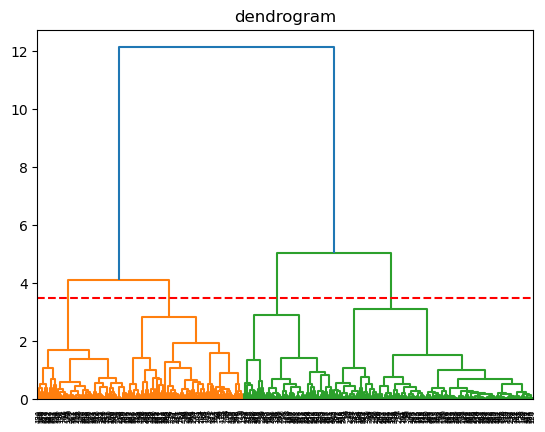

In [27]:
# make a dendrogram to estimate the number of clusters
plt.figure()
shc.dendrogram(shc.linkage(scaled_df,method= "ward"))
plt.title("dendrogram")
plt.axhline(3.5,color= "red",linestyle= "--")

In [30]:
# use agglomerative format of hierarchial clustering
agglomerate_cluster= AgglomerativeClustering(n_clusters= 4,
                       affinity= "euclidean",linkage= "ward")
cluster_labels= agglomerate_cluster.fit_predict(scaled_df)

C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [48]:
df.shape

(440, 8)

In [40]:
# get a color scheme for visualisation
color= sns.color_palette(palette= "viridis",n_colors= scaled_df.cluster.nunique())
scaled_df["cluster"]= scaled_df.cluster.map({0:color[0],
                              1:color[1],
                              2:color[2],
                              3:color[3]})

In [50]:
scaled_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809,"(0.163625, 0.471133, 0.558148)"
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286,"(0.163625, 0.471133, 0.558148)"
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619,"(0.163625, 0.471133, 0.558148)"
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494,"(0.134692, 0.658636, 0.517649)"
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294,"(0.253935, 0.265254, 0.529983)"


Text(0.5, 0.92, '3D scatter plot')

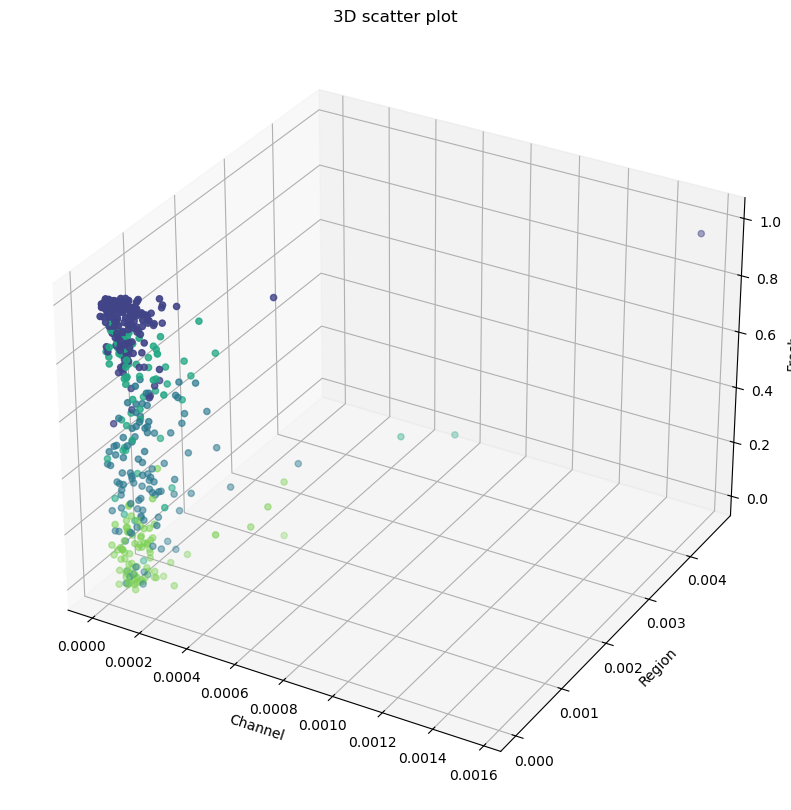

In [53]:
# make a 3D scatter plot
fig= plt.figure(figsize= (10,10))
ax= fig.add_subplot(projection= "3d")
ax.scatter(data= scaled_df,xs= "Channel",ys= "Region",zs= "Fresh",
          c= "cluster",marker= "o")

# set labels and title 
ax.set_xlabel("Channel")
ax.set_ylabel("Region")
ax.set_zlabel("Fresh")
ax.set_title("3D scatter plot")